# Abstract

Autistic Spectrum Disorder (ASD) is a neurodevelopment condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.

The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits. However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature. Hence, we propose a new dataset related to autism screening of adults that contained 20 features to be utilised for further analysis especially in determining influential autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (AQ-10-Adult) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science.

# Importing The Datset

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest       
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt

%matplotlib inline
df = pd.read_csv(r'C:\Users\Udish Nagpal\Desktop\dataset.csv')
display(df.head(n=5))

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,gender,ethnicity,jundice,autism,country,used_b4,result,age_desc,relation,class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [2]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'age',
       'gender', 'ethnicity', 'jundice', 'autism', 'country', 'used_b4',
       'result', 'age_desc', 'relation', 'class/ASD'],
      dtype='object')

In [3]:
# Number of instances
Total = len(df.index)

#Number of records where individual's with ASD
class_yes = len(df[df['class/ASD'] == 'YES'])
#Percentage of individuals whose are with ASD
ASD_percent= float(class_yes) /Total *100

#Number of records where individual's with no ASD
class_no = len(df[df['class/ASD'] == 'NO'])

print ("Total records: {}".format(Total))
print ("Individuals diagonised with ASD: {}".format(class_yes))
print ("Individuals not diagonised with ASD: {}".format(class_no))
print ("Percentage of individuals diagonised with ASD: {:.2f}%".format(ASD_percent))

Total records: 704
Individuals diagonised with ASD: 188
Individuals not diagonised with ASD: 515
Percentage of individuals diagonised with ASD: 26.70%


# Features Exploration 

This data contains 704 instances, and contains the following attributes:
    
    age: number (Age in years).
    gender: String [Male/Female].
    ethnicity: String (List of common ethnicities in text format).
    Born with jaundice: Boolean [yes or no].
    Family member with PDD: Boolean [yes or no].
    Who is completing the test: String [Parent, self, caregiver, medical staff, clinician ,etc.].
    Country of residence : String (List of countries in text format).
    Used the screening app before : Boolean [yes or no] (Whether the user has used a screening app)
    Screening Method Type: Integer [0,1,2,3] (The type of screening methods chosen based on age category (0=toddler, 1=child, 2= adolescent, 3= adult).
    Question 1-10 Answer: Binary [0, 1] (The answer code of the question based on the screening method used).
    Screening Score: Integer (The final score obtained based on the scoring algorithm of the screening method used. This was computed in an automated manner).


# Data Preprocessing

Before data can be used as input for machine learning algorithms, it must be cleaned, formatted, and maybe even restructured — this is typically known as preprocessing. Unfortunately, for this dataset, there are many invalid or missing entries(?) we must deal with, moreover, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

I use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names 

In [13]:
data = pd.read_csv(r'C:\Users\Udish Nagpal\Desktop\dataset.csv', na_values=['?'])
data.head(n=5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,gender,ethnicity,jundice,autism,country,used_b4,result,age_desc,relation,class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


In [14]:
data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


There are quite a few missing values in the data set. Before I just drop every row that's missing data, I make sure not to bias the data in any way. In other words we need to make sure that there does not appear to be any sort of correlation to what sort of data has missing fields. If there were, I'd have to try and go back and fill that data in.

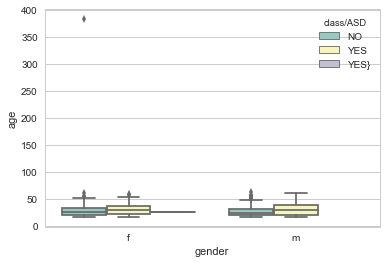

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x="gender", y="age", hue="class/ASD",data=data, palette="Set3")

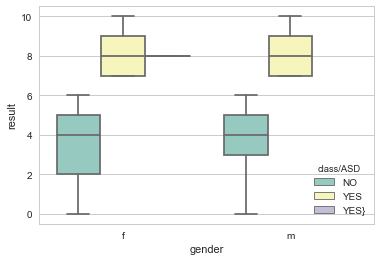

In [16]:
ax = sns.boxplot(x="gender", y="result", hue="class/ASD",data=data, palette="Set3")

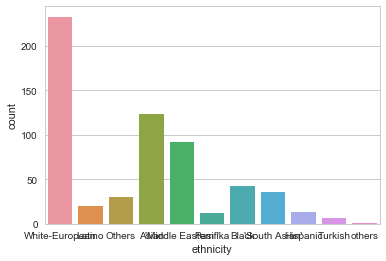

In [17]:
 ax = sns.countplot(x="ethnicity", data=data)

# Data Cleaning

We want to find the rows that do have missing values in any of the feature columns.

In [18]:
data.loc[(data['age'].isnull()) |(data['gender'].isnull()) |(data['ethnicity'].isnull()) 
|(data['jundice'].isnull())|(data['autism'].isnull()) |(data['country'].isnull())
            |(data['used_b4'].isnull())|(data['result'].isnull())|(data['age_desc'].isnull())
            |(data['relation'].isnull())]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,gender,ethnicity,jundice,autism,country,used_b4,result,age_desc,relation,class/ASD
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO
10,1,0,0,0,0,0,1,1,0,1,...,m,NaN,no,no,Austria,no,4,'18 and more',NaN,NO
11,1,0,0,0,0,0,1,1,0,1,...,f,NaN,no,no,Argentina,no,4,'18 and more',NaN,NO
14,1,1,1,1,0,0,0,1,0,0,...,m,NaN,no,no,Lebanon,no,5,'18 and more',NaN,NO
51,1,1,0,0,0,0,0,0,0,0,...,f,NaN,yes,no,Jordan,no,2,'18 and more',NaN,NO
52,1,0,0,0,0,0,1,0,0,1,...,m,NaN,no,no,Jordan,no,3,'18 and more',NaN,NO
153,1,0,0,0,0,0,1,1,0,1,...,f,NaN,yes,no,'United Arab Emirates',no,4,'18 and more',NaN,NO
192,1,0,1,1,1,1,0,0,1,1,...,f,NaN,no,yes,Russia,no,7,'18 and more',NaN,YES
197,1,0,0,0,1,0,0,0,1,0,...,m,NaN,no,no,Jordan,no,3,'18 and more',NaN,NO
198,1,1,0,0,0,0,0,0,0,0,...,f,NaN,no,yes,Jordan,no,2,'18 and more',NaN,NO


We found the no. of missing values attribute_wise

In [19]:
data.isnull().sum()

A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
age           2
gender        0
ethnicity    95
jundice       0
autism        0
country       0
used_b4       0
result        0
age_desc      0
relation     95
class/ASD     0
dtype: int64

The missing values are predominantly categorical(mostly under attributes 'Relation' and 'Ethnicity'). This makes it difficult to create replacement values as we cannot substitute the mean or median for non numeric variables.
Therefore, we remove the instances that have missing values and keep only complete instances in a new dataset. 

In [20]:
data.dropna(inplace= True)
data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,age,result
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,0.740558,0.469622,0.481117,0.520525,0.525452,0.307061,0.428571,0.665025,0.341544,0.597701,30.215107,5.077176
std,0.438689,0.499487,0.500054,0.499989,0.499762,0.461654,0.495278,0.472370,0.474617,0.490765,17.287470,2.522717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


The max age in the dataset is coming out to be 383 which is obviously a typing error and it maybe changes to 38.

In [21]:
data[data['age']==383]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,gender,ethnicity,jundice,autism,country,used_b4,result,age_desc,relation,class/ASD
29,1,0,0,0,0,0,0,0,0,0,...,f,Pasifika,no,no,'New Zealand',no,1,'18 and more',Self,NO


In [22]:
data.set_value(29, 'age', 38, takeable=False)

D:\Technical\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,gender,ethnicity,jundice,autism,country,used_b4,result,age_desc,relation,class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES
6,1,1,1,1,0,0,0,0,1,0,...,m,White-European,no,no,'New Zealand',no,5,'18 and more',Parent,NO
7,1,1,0,0,1,0,0,1,1,1,...,m,White-European,no,no,'United States',no,6,'18 and more',Self,NO
8,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8,'18 and more','Health care professional',YES
9,1,1,1,1,1,1,1,1,1,1,...,m,White-European,no,no,'United States',no,10,'18 and more',Relative,YES
12,1,1,0,1,1,0,0,1,0,1,...,m,'Middle Eastern ',no,yes,'New Zealand',no,6,'18 and more',Parent,NO


We check data types of all our features including the target feature. Moreover, lets count the total number of instances and the target-class distribution.

In [23]:
# Reminder of the features:
print(data.dtypes)


# Total number of records in clean dataset
Total = len(data.index)

# TODO: Number of records where individual's with ASD in the clean dataset
class_yes = len(data[data['class/ASD'] == 'YES'])

# TODO: Number of records where individual's with no ASD in the clean dataset
class_no = len(data[data['class/ASD'] == 'NO'])

# Print the results
print ("Total number of records: {}".format(Total))
print ("Individuals diagonised with ASD: {}".format(class_yes))
print ("Individuals not diagonised with ASD: {}".format(class_no))

A1             int64
A2             int64
A3             int64
A4             int64
A5             int64
A6             int64
A7             int64
A8             int64
A9             int64
A10            int64
age          float64
gender        object
ethnicity     object
jundice       object
autism        object
country       object
used_b4       object
result         int64
age_desc      object
relation      object
class/ASD     object
dtype: object
Total number of records: 609
Individuals diagonised with ASD: 179
Individuals not diagonised with ASD: 429


In [24]:
# Split the data into features and target label
Y = data['class/ASD']
X = data[['age', 'gender', 'ethnicity', 'jundice', 'autism', 'country', 'result',
                      'relation','A1','A2','A3','A4','A5','A6','A7','A8',
                      'A9','A10']]

# Normalising the feature_values

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()

numerical = ['age', 'result']

data_final2= pd.DataFrame(data = X)
data_final2[numerical] = scaler.fit_transform(X[numerical])
data_final2
# Show an example of a record with scaling applied
display(data_final2.head(n = 5))

,age,gender,ethnicity,jundice,autism,country,result,relation,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,0.191489,f,White-European,no,no,'United States',0.6,Self,1,1,1,1,0,0,1,1,0,0
1,0.148936,m,Latino,no,yes,Brazil,0.5,Self,1,1,0,1,0,0,0,1,0,1
2,0.212766,m,Latino,yes,yes,Spain,0.8,Parent,1,1,0,1,1,0,1,1,1,1
3,0.382979,f,White-European,no,yes,'United States',0.6,Self,1,1,0,1,0,0,1,1,0,1
5,0.404255,m,Others,yes,no,'United States',0.9,Self,1,1,1,1,1,0,1,1,1,1


# One Hot Coding

From the table in Clean Data Sets above, we can see there are several features for each record that are non-numeric such as Country_of_residence, ethnicity etc. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) be converted. One popular way to convert categorical variables is by using the one-hot encoding scheme. One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature. For example, assume someFeature has three possible entries: A, B, or C. We then encode this feature into someFeature_A, someFeature_B and someFeature_C.

In [26]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
data_final3 = pd.get_dummies(data_final2)

display(data_final3.head(5))


# Encode the 'all_classes_raw' data to numerical values
classes = Y.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(data_final3.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded)

,age,result,A1,A2,A3,A4,A5,A6,A7,A8,...,country_Sweden,country_Tonga,country_Turkey,country_Ukraine,country_Uruguay,relation_'Health care professional',relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.191489,0.6,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0.148936,0.5,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.212766,0.8,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0.382979,0.6,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
5,0.404255,0.9,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1


94 total features after one-hot encoding.
['age', 'result', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'gender_f', 'gender_m', "ethnicity_'Middle Eastern '", "ethnicity_'South Asian'", 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'jundice_no', 'jundice_yes', 'autism_no', 'autism_yes', "country_'Costa Rica'", "country_'Czech Republic'", "country_'New Zealand'", "country_'Saudi Arabia'", "country_'Sierra Leone'", "country_'South Africa'", "country_'Sri Lanka'", "country_'United Arab Emirates'", "country_'United Kingdom'", "country_'United States'", "country_'Viet Nam'", 'country_Afghanistan', 'country_AmericanSamoa', 'country_Angola', 'country_Armenia', 'country_Aruba', 'country_Australia', 'country_Austria', 'country_Bahamas', 'country_Bangladesh', 'country_Belgium', 'country_Bolivia', 'country_Brazil', 'country_Burundi', 'co

# Splitting Data

In [27]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(data_final3,classes, train_size=0.75, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.75, random_state=1)


# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 456 samples.
Testing set has 153 samples.


D:\Technical\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [28]:
X_train

,age,result,A1,A2,A3,A4,A5,A6,A7,A8,...,country_Sweden,country_Tonga,country_Turkey,country_Ukraine,country_Uruguay,relation_'Health care professional',relation_Others,relation_Parent,relation_Relative,relation_Self
609,0.063830,0.2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
67,0.468085,0.2,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
280,0.085106,0.3,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
352,0.531915,0.8,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
82,0.000000,0.9,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
302,0.127660,0.4,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
626,0.085106,0.3,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
338,0.276596,0.4,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
74,0.297872,0.3,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
627,0.148936,0.4,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


# Modelling

Now, we will apply some of the known ML Algorithms and compare their classifying results.

# Decision Trees

Why Decision Tree?

Just because Decision Tree Classification performs well on Binary Classification(When number of categories are comparatively less).

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


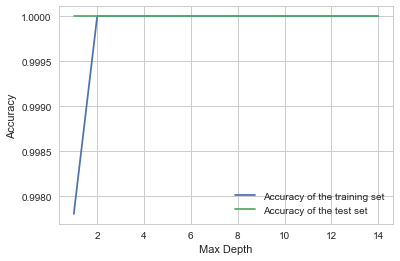

In [29]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

training_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=70)
    tree.fit(X_train,y_train)
    y_pred = tree.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

# Train the classifier on the training set


In [30]:
print('Feature importances: {}'.format(tree.feature_importances_))
type(tree.feature_importances_)

Feature importances: [0.         0.98988285 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01011715 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


numpy.ndarray

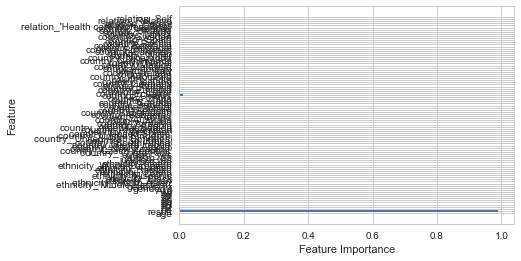

In [32]:
n_feature = data_final3.shape[1]
plt.barh(range(n_feature), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), data_final3)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

The most firm identifier of the Classification is 'Result' attribute. Also the data gives great accuracy after max_dept = 2.

In [33]:

tree = DecisionTreeClassifier(max_depth=2,random_state=74)
tree.fit(X_train,y_train)
tree.score(X_train, y_train)
tree.score(X_test, y_test)


1.0

# Evaluating Model Performance

Metrics

We can use F-beta score as a metric that considers both precision and recall:
$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the F$_{0.5}$ score (or F-score for simplicity).
Note: Recap of accuracy, precision, recall

Accuracy measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

Precision tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

[True Positives/(True Positives + False Positives)]

Recall (sensitivity) tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

[True Positives/(True Positives + False Negatives)]

For classification problems that are skewed in their classification distributions like in our case where we have

    a total of 609 records with
    180 individuals diagonised with ASD and
    429 individuals not diagonised with ASD

accuracy by itself is not a very good metric. Thus, in this case precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

In [34]:
y_pred_class = tree.predict(X_test)

In [35]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[117   0]
 [  0  36]]


 Classification Accuracy: Overall, how often is the classifier correct?

In [36]:
print((TP + TN) / float(TP + TN + FP + FN))

1.0


Classification Error: Overall, how often is the classifier incorrect?

In [37]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

0.0


Sensitivity: When the actual value is positive, how often is the prediction correct?

In [38]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

1.0
1.0


Specificity: When the actual value is negative, how often is the prediction correct?

In [39]:
specificity = TN / (TN + FP)

print(specificity)

1.0


False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [40]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)

0.0


Precision: When a positive value is predicted, how often is the prediction correct

In [41]:
precision = TP / float(TP + FP)


print(metrics.precision_score(y_test, y_pred_class))

1.0


In [42]:
y_pred_prob = tree.predict_proba(X_test)[:, 1]

In [43]:

import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0,0.5,'Frequency')

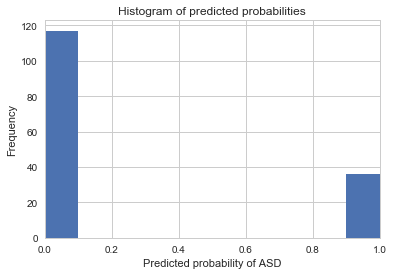

In [44]:
plt.hist(y_pred_prob, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of ASD')
plt.ylabel('Frequency')

# Receiver Operating Characteristic (ROC) Curves

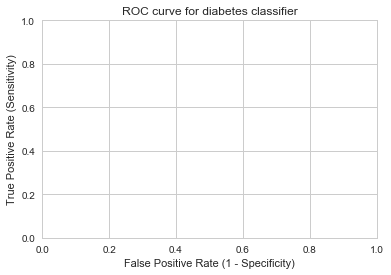

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
training_accuracy = []
test_accuracy = []

n_estimators = range(1,15)

for n in n_estimators:
    ranfor = RandomForestClassifier(n_estimators=n, random_state=1)
    ranfor.fit(X_train,y_train)
    training_accuracy.append(ranfor.score(X_train, y_train))
    test_accuracy.append(ranfor.score(X_test, y_test))




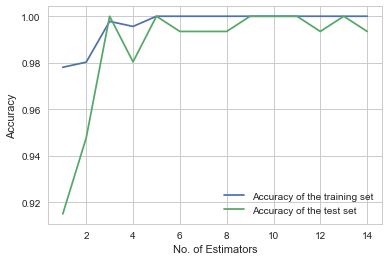

In [47]:
plt.plot(n_estimators,training_accuracy, label='Accuracy of the training set')
plt.plot(n_estimators,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('No. of Estimators')
plt.legend()


The best value of n_estimators are 3,5,9 and 10. The best value of the no. of estimators would be 3. 

# K Nearest Neighbours

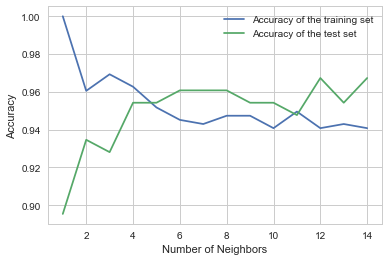

In [48]:
training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1,15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

The best values of number of neighbours are 6 and 8. Here,the model doesn't overfit.
The accuracies here are:

In [49]:
print("Accuracy of the training set for 6NN: {:3f}".format(training_accuracy[5]))
print("Accuracy of the test set for 6NN: {:3f}".format(test_accuracy[5]))

Accuracy of the training set for 6NN: 0.945175
Accuracy of the test set for 6NN: 0.960784


In [50]:
print("Accuracy of the training set for 8NN: {:3f}".format(training_accuracy[8]))
print("Accuracy of the test set for 8NN: {:3f}".format(test_accuracy[8]))

Accuracy of the training set for 8NN: 0.947368
Accuracy of the test set for 8NN: 0.954248


# Naive Bayes

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import cross_val_score

#scaler = preprocessing.MinMaxScaler()
#all_features_minmax = scaler.fit_transform(all_features)

nb = MultinomialNB()
cv_scores = cross_val_score(nb, data_final3, classes, cv=10)

cv_scores.mean()

D:\Technical\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.873551912568306

F Beta Score

In [52]:
nb.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = nb.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.7175925925925927

# SVM

In [53]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C, gamma=2) #specifying the kernel used for SVM decison boundary

In [54]:
cv_scores = cross_val_score(svc, data_final3, classes, cv=10)

cv_scores.mean()

0.9983606557377049

F Beta Score

In [55]:
svc.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

# Conclusion

We cleansed the data-set by correcting outlier values, removing observations containing missing values and dropping unnecessary variables. The loss of 95 observations is not ideal. However, it is difficult to replace missing values of a categorical nature as there is no median or mean to work with.

The Decsion Tree Classifier and Random Forest give close to 100% accuracy because of the fact that the prediction considers close to 99% weightage from a single attribute,i.e, the 'result' attribute.
The linear SVM also performs well with close to 99.8% accuracy.
The KNN Classifier gives 96% accuracy. 
The Naive Bayes gives 87.3% mean accuracy.